In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from sklearn.cluster import KMeans, DBSCAN


# Reading raster

### with opencv2

In [3]:
path = "/home/afonso/FilRouge_territoires/crop_SENTINEL2A_20151226-111142-750_L2A_T31UDQ_D_V1-1.tif"
image = cv2.imread(path)

### with rasterio

In [4]:
raster = rio.open('crop_SENTINEL2A_20151226-111142-750_L2A_T31UDQ_D_V1-1.tif')
band1 = raster.read(1)
band2 = raster.read(2)
band3 = raster.read(3)
band4 = raster.read(4)
img = cv2.merge((band1, band2,
                band3, band4))

# Visualisation


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


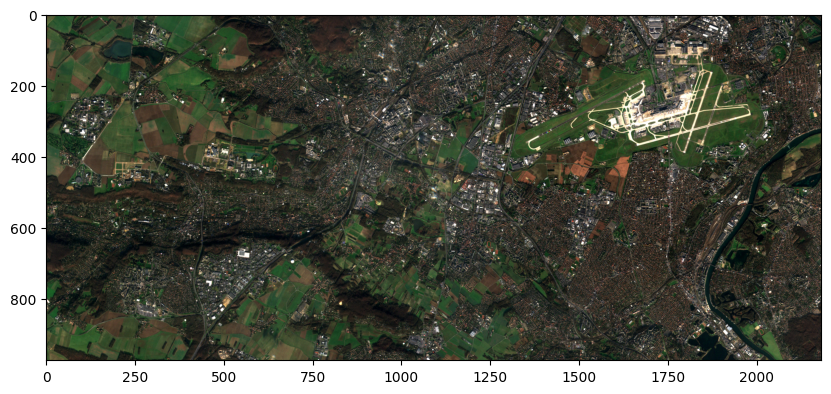

In [133]:
img1 = cv2.merge((raster.read(2), raster.read(3), raster.read(4)))
img1 = (img1/8).astype(int)

plt.figure(figsize=(10,10))
plt.imshow(img1)

# Kmeans


In [6]:
vectorized = img.reshape((-1, 4))
vectorized = np.float32(vectorized)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(vectorized)
vec_pred = kmeans.predict(vectorized)

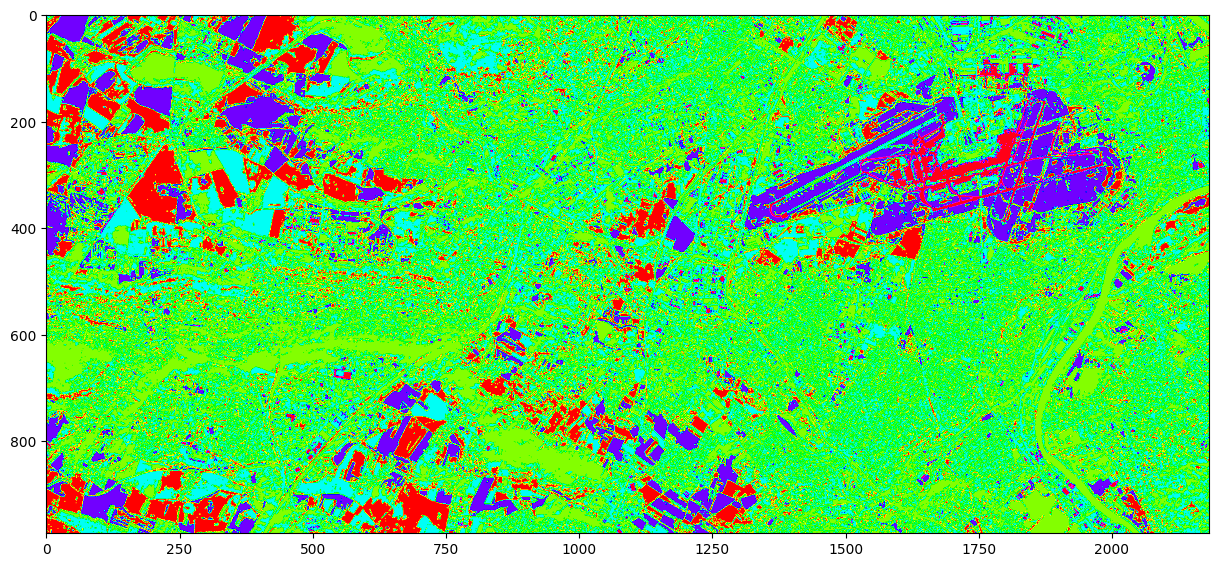

In [173]:
img_pred = vec_pred.reshape((973,2182))

plt.figure(figsize=(15,15))
plt.imshow(img_pred, cmap="hsv")

# DBSCAN


In [5]:
dbscan = DBSCAN(eps=150, min_samples=50, metric = 'euclidean',algorithm ='auto')
# dbscan.fit(vectorized)
# vec_pred_db = dbscan.fit_predict(vectorized)

In [7]:
indices = np.dstack(np.indices(img.shape[:2]))
xycolors = np.concatenate((img, indices), axis=-1) 
feature_image2 = np.reshape(xycolors, [-1,6])
dbscan.fit(feature_image2)
labels2 = dbscan.labels_

: 

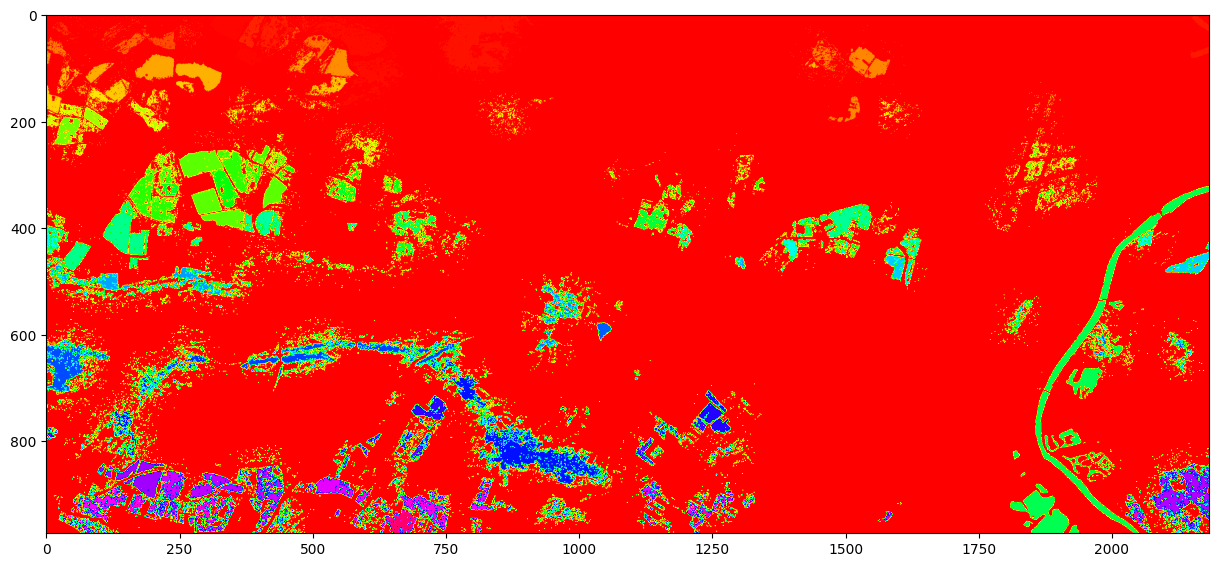

In [195]:
# img_pred_db = vec_pred_db.reshape((973,2182))
lab2_mat = labels2.reshape((973,2182))

plt.figure(figsize=(15,15))
plt.imshow(lab2_mat, cmap="hsv")